# Importing all libraries

In [94]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Unable to locate an executable at "/Users/asmaa/Library/Java/JavaVirtualMachines/openjdk-17.0.2/Contents/Home/bin/apt" (-1)
Traceback (most recent call last):
  File "/usr/local/bin/pip", line 11, in <module>
    load_entry_point('pip==21.1.1', 'console_scripts', 'pip')()
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/pkg_resources/__init__.py", line 489, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/pkg_resources/__init__.py", line 2843, in load_entry_point
    return ep.load()
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/pkg_resources/__init__.py", line 2434, in load
    return self.resolve()
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/pkg_resources/__init__.py", line 2440, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import folium
import numpy as np
import seaborn as sns 
import scipy as sp
from scipy.stats import shapiro 
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder


# Data exploration
Loading our dataset and getting familiar with it

In [7]:
#please uncomment only one of the two files below to be read into the project. 

df = pd.read_csv('../DataSets/riga_4689.csv')
# df = pd.read_csv('../DataSets/riga_merged_8846.csv')



# Printing top 5 rows
df.head(5)


,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [8]:
# Checking total amount of rows in given dataset
len(df)

4689

Checking the operation types in op_type column :

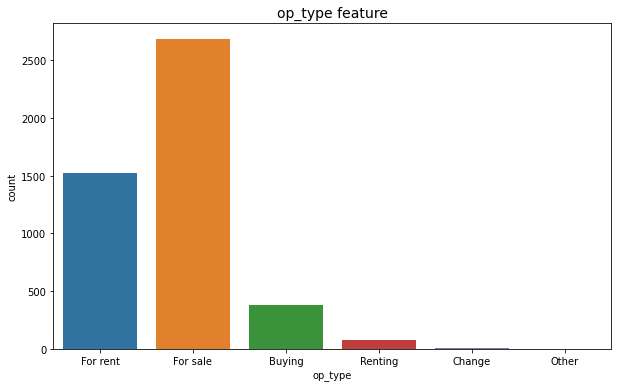

In [9]:
plt.figure(figsize = (10, 6))
plt.title("op_type feature", fontsize=14)
ax = sns.countplot(x = 'op_type',data = df)

In [10]:

# Grouping by operation type and getting statistics within groups
df_by_op_type = df.groupby('op_type')
df_by_op_type.describe()


area                                                         \
           count       mean        std   min    25%   50%    75%    max   
op_type                                                                   
Buying      96.0  28.583333  35.514465   1.0   7.00  11.0  33.00  150.0   
Change      10.0  57.350000  48.887655  21.5  35.75  39.0  56.25  190.0   
For rent  1525.0  55.370807  34.460491   5.0  33.00  48.0  68.00  300.0   
For sale  2680.0  65.774899  35.954179  12.0  44.00  58.0  78.00  427.0   
Other        5.0  32.000000  16.077935  15.0  18.00  30.0  48.00   49.0   
Renting      9.0  57.222222  16.029487  30.0  50.00  60.0  70.00   80.0   

           floor             ...        lat                lon             \
           count       mean  ...        75%        max   count       mean   
op_type                      ...                                            
Buying     123.0  37.504065  ...  46.314475  57.047428   381.0  11.496010   
Change      12.0   4.333333  ...  56.952481  56.986689    13.0  19.099330   
For rent  1525.0   3.722623  ...  56.963246  59.347471  1451.0  23.496124   
For sale  2680.0   3.526866  ...  56.965763  57.146515  2549.0  23.604366   
Other        5.0   3.800000  ...  56.949448  56.961863     5.0  24.132074   
Renting     11.0   1.545455  ...  46.314475  56.947288    83.0  11.522384   

                                                                            
               std         min        25%        50%        75%        max  
op_type                                                                     
Buying    2.378281   11.048029  11.048029  11.048029  11.048029  24.225406  
Change    6.625366   11.048029  11.048029  24.052744  24.136366  24.308342  
For rent  8.670202 -100.708194  24.097433  24.127667  24.152956  24.308342  
For sale  7.833637 -100.708194  24.095453  24.126845  24.178037  24.340866  
Other     0.082839   24.003491  24.120599  24.125564  24.205359  24.205359  
Renting   2.464521   11.048029  11.048029  11.048029  11.048029  24.308342  

[6 rows x 48 columns]

As you see, there are also other values like "Buying", "Renting", "Change" and "Other". Before continuing, let's do the following:
1. Drop entries with operations "Change", "Other" as irrelevant to our goal - price prediction
2. Drop entries with operations "Buying" and "Renting" as they are presented with very few samples

In [11]:
df_filt = df[~df['op_type'].isin(['Change', 'Other', 'Buying', 'Renting'])]
len(df_filt)

4205

Let's explore unique districts in **district** column:

In [12]:
df_filt.district.unique()

array(['Purvciems', 'Ziepniekkalns', 'centrs', 'Ķengarags', 'Teika',
       'Imanta', 'Jugla', 'Mangaļi', 'Mežciems', 'Maskavas priekšpilsēta',
       'Zolitūde', 'Bolderāja', 'Grīziņkalns', 'Dreiliņi', 'Pļavnieki',
       'Dzegužkalns', 'Ķīpsala', 'Krasta r-ns', 'Klīversala',
       'Vecmīlgrāvis', 'Āgenskalns', 'Zasulauks', 'Mežaparks',
       'Čiekurkalns', 'Sarkandaugava', 'Daugavgrīva', 'Iļģuciems',
       'Berģi', 'Šķirotava', 'Dārzciems', 'Vecrīga', 'Bieriņi', 'Brekši',
       'Kundziņsala', 'Jaunciems', 'Torņakalns', 'Mangaļsala',
       'Šampēteris-Pleskodāle', 'Bukulti', 'Voleri', nan, 'Vecdaugava',
       'Aplokciems', 'Katlakalns', 'Kleisti', 'Vecāķi', 'Buļļi',
       'Jaunmīlgrāvis', 'VEF'], dtype=object)

let's look at unique values of other columns as well

In [13]:
for col in ['floor', 'total_floors']:
    print(col, ":", sorted(df_filt[col].unique()))

floor : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 21.0, 23.0, 24.0]
total_floors : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 22.0, 23.0, 24.0, 25.0, 27.0, 29.0, 30.0]


Floor values look fine.

In [14]:
 for col in ['house_seria', 'house_type', 'condition']:
    print(col, ":", df_filt[col].unique())
    

house_seria : ['LT proj.' '602.' 'P. kara' 'Jaun.' 'Specpr.' 'Hrušč.' '119.' 'M. ģim.'
 'Renov.' '103.' 'Priv. m.' '467.' 'Staļina' '104.' 'Čehu pr.']
house_type : ['Brick-Panel' 'Panel' 'Wood' 'Masonry' 'Brick' 'Panel-Brick']
condition : ['All amenities' 'Partial amenities' 'Without amenities']


One not coming from the eastern europe might be confused by the **house_seria** values, but believe us - they are fine. Despite Riga being the city with the highest concentration of [Art Nouveau architecture](https://en.wikipedia.org/wiki/Art_Nouveau_architecture_in_Riga) anywhere in the world, there are also many standardized apartment blocks constructed in the [Soviet period](https://en.wikipedia.org/wiki/Urban_planning_in_communist_countries), so **602**, **119**, **103.**, **467.**, **104.** are just weird names of construction projects. We will treat them as ordinary categorical values.


Now let's check lat and lon columns:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


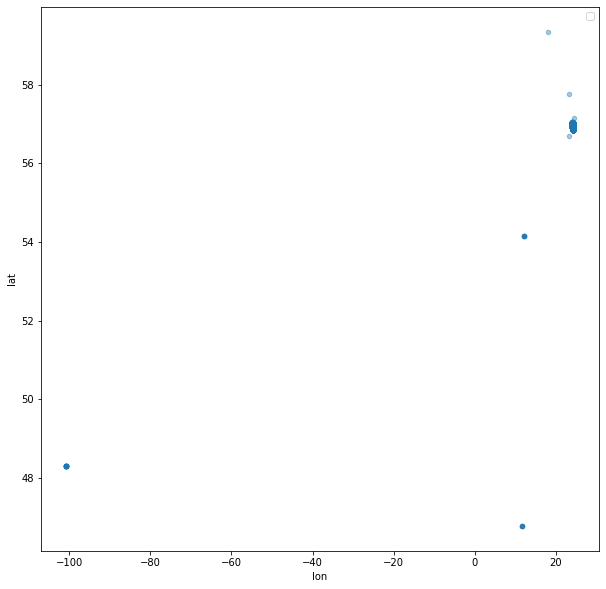

In [15]:
viz=df_filt.plot(kind='scatter', x='lon', y='lat', alpha=0.4, figsize=(10,10))
viz.legend()

The latitude of Rīga, Latvia is 56.946285, and the longitude is 24.105078. While some of the values seem to be within a correct range, there are broken values, that make plot look terribly zoomed out. Let's check how many samples have wrong coordinates. Previous plot allows us to assume all broken values deviate too much from real Riga coordinates, so we can use rough comparison to filter them out.

In [16]:
wrong = df_filt[(df_filt['lat'] < 55)|(df_filt['lat'] > 58)|(df_filt['lon'] < 24)|(df_filt['lon'] > 25)]
len(wrong)

47

Not so many to worry about, let's just drop them and see how plot looks without broken values:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


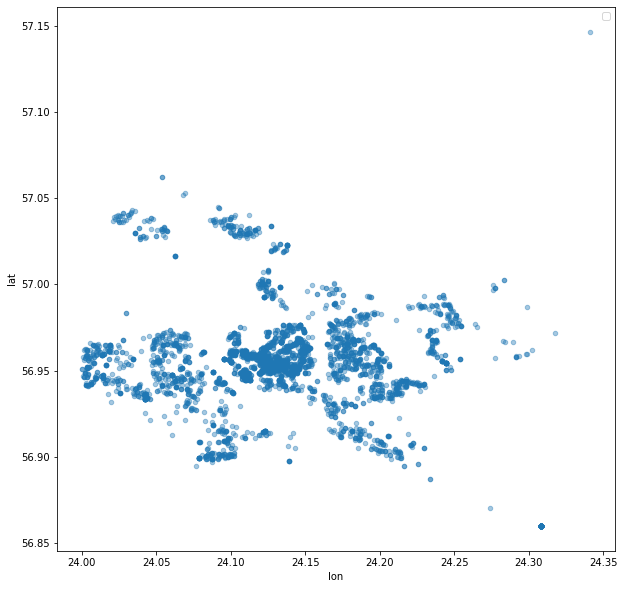

In [17]:
df_filt = df_filt[~((df_filt['lat'] < 55)|(df_filt['lat'] > 58)|(df_filt['lon'] < 24)|(df_filt['lon']>25))]
viz=df_filt.plot(kind='scatter', x='lon', y='lat', alpha=0.4, figsize=(10,10))
viz.legend()

Much better! All items are now concentrated within a single location matching Riga coordinates. Let's see them overlaying actual Riga map:

In [18]:

# Define helper function to plot over Riga map
def plot_on_riga_map(data_frame): 
    riga_map = folium.Map(
        location=[56.946285, 24.105078],
        tiles='cartodbpositron',
        zoom_start=12,
    )
    data_frame.apply(lambda row:folium.Marker(location=[row["lat"], row["lon"]]).add_to(riga_map), axis=1)
    return riga_map

In [19]:
plot_on_riga_map(df_filt[~df_filt['lon'].isna()].head(500))

# Handling missing values


Let's define a helper function to get missing values for a dataframe

In [20]:
def missing(df):
    df_missing = pd.DataFrame(df.isna().sum().sort_values(ascending = False), columns = ['missing_count'])
    df_missing['missing_share'] = df_missing.missing_count / len(df)
    return df_missing

In [21]:
missing(df_filt)

,missing_count,missing_share
lat,205,0.049303
lon,205,0.049303
district,2,0.000481
rooms,1,0.000241
op_type,0,0.000000
street,0,0.000000
area,0,0.000000
floor,0,0.000000
total_floors,0,0.000000
house_seria,0,0.000000


## Missing geo coordinates
It can be seen that most missing values come from geo coordinate columns - **lon** and **lat**. However, these missing values are not resolved, due to the uselessness of these two columns, which are eventually deleted. For the record, to reach this conclusion they had been properly handled at the first trails of this project, but not anymore.   

## Missing districts
Let's take a look at the entries with missing district value:

In [22]:
df_filt.loc[df_filt['district'].isna()]

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
1197,For sale,NaN,Ogļu 32,3,79.0,1.0,4.0,Renov.,Masonry,All amenities,260000.0,56.960841,24.081765
3577,For sale,NaN,Pupuku iela 9,2,55.0,1.0,5.0,Jaun.,Panel,All amenities,90000.0,56.905114,24.143239


One can find out missing district names by looking at rows with the same street:

In [23]:
df_filt.loc[df_filt.street.str.startswith('Ogļu')]

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
319,For rent,Ķīpsala,Ogļu 32,3,80.0,1.0,4.0,Renov.,Masonry,All amenities,1200.0,56.960841,24.081765
320,For sale,Ķīpsala,Ogļu 30,3,104.0,2.0,2.0,Jaun.,Masonry,All amenities,320000.0,56.960680,24.081836
1185,For sale,Ķīpsala,Ogļu 30,3,100.0,1.0,3.0,Jaun.,Masonry,All amenities,300000.0,56.960680,24.081836
1186,For sale,Ķīpsala,Ogļu 32,3,130.0,4.0,4.0,Renov.,Masonry,All amenities,450000.0,56.960841,24.081765
1193,For sale,Ķīpsala,Ogļu 30,3,140.0,3.0,3.0,Jaun.,Masonry,All amenities,350000.0,56.960680,24.081836
1197,For sale,NaN,Ogļu 32,3,79.0,1.0,4.0,Renov.,Masonry,All amenities,260000.0,56.960841,24.081765
1198,For sale,Ķīpsala,Ogļu 30,3,99.0,2.0,3.0,Jaun.,Masonry,All amenities,330000.0,56.960680,24.081836
3824,For sale,Ķīpsala,Ogļu 32,3,80.0,2.0,4.0,Renov.,Masonry,All amenities,260000.0,56.960841,24.081765
3825,For rent,Ķīpsala,Ogļu 32,3,80.0,2.0,4.0,Renov.,Masonry,All amenities,1200.0,56.960841,24.081765
3826,For sale,Ķīpsala,Ogļu 32,3,79.0,1.0,4.0,P. kara,Masonry,All amenities,265000.0,56.960841,24.081765


Great! There are multiple properties listed at the same address - Ogļu 32. Let's impute missing value:

In [24]:
df_filt.loc[df_filt.street == 'Ogļu 32', 'district'] = 'Ķīpsala'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Let's try doing the same for **Pupuku iela 9**:

In [25]:
df_filt.loc[df_filt.street.str.startswith('Pupuku')]

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
3577,For sale,NaN,Pupuku iela 9,2,55.0,1.0,5.0,Jaun.,Panel,All amenities,90000.0,56.905114,24.143239


No luck this time - this is the only property on the **Pupuku** street in our dataset. We might use alternative approach to seach nearest points within some range using **lat** **lon** column values, but it would be overkill for a single row. Let's impute district manually by finding **Pupuku iela 9** on [Google Maps](https://www.google.com/maps/place/Pupu%C4%B7u+iela+9,+Zemgales+priek%C5%A1pils%C4%93ta,+R%C4%ABga,+LV-1076/@56.9051591,24.1411307,17z/data=!3m1!4b1!4m5!3m4!1s0x46eed191e0607163:0xb7e8552585e17c39!8m2!3d56.9051591!4d24.1433194):

In [26]:
df_filt.loc[df_filt.street == 'Pupuku iela 9', 'district'] = 'Valdlauči'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Once again, let's review what else is missing:

In [27]:
missing(df_filt)

,missing_count,missing_share
lat,205,0.049303
lon,205,0.049303
rooms,1,0.000241
op_type,0,0.000000
district,0,0.000000
street,0,0.000000
area,0,0.000000
floor,0,0.000000
total_floors,0,0.000000
house_seria,0,0.000000


## Invalid or missing Rooms
 let's check unique room values:

In [28]:
df_filt.rooms.unique()

array(['1', '2', '3', '4', '5', 'Citi', '6', nan], dtype=object)

 It turns out this column is categorical due to the presence of value "Citi". This is bad, as room count by nature is numerical and might be important input for correct price prediction in our model. So what does this "Citi" really mean for **rooms**? "Citi" translates from Latvian as "Other". In our context this word might describe some special architectural solutions, where room count can't be clearly defined. 

For the sake of data integrity let's treat "Citi" the same way as missing value:

In [29]:
df_filt.loc[df_filt['rooms'] == 'Citi', 'rooms'] = None
df_filt.loc[df_filt['rooms'].isna()]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
79,For rent,Sarkandaugava,Tilta 5,None,76.0,2.0,4.0,P. kara,Masonry,All amenities,295.0,56.995073,24.127396
315,For rent,centrs,Brīvības 103,None,300.0,4.0,5.0,Specpr.,Masonry,All amenities,350.0,56.961433,24.133111
384,For sale,centrs,Blaumaņa 9,None,287.0,5.0,6.0,Renov.,Brick,All amenities,298544.0,56.953926,24.123761
535,For sale,Vecrīga,Kungu 25,None,330.0,5.0,6.0,Specpr.,Panel,All amenities,474990.0,56.945338,24.109464
605,For sale,centrs,Blaumaņa 36,None,190.0,4.0,5.0,P. kara,Brick,All amenities,350000.0,56.951729,24.125815
884,For sale,Āgenskalns,M. Nometņu 85,None,207.0,2.0,2.0,P. kara,Wood,All amenities,79000.0,56.937791,24.055589
1579,For sale,centrs,Hospitāļu 40,None,189.0,3.0,4.0,Staļina,Masonry,All amenities,240000.0,56.975886,24.139173
1769,For sale,centrs,Dārzaugļu 1,NaN,214.0,5.0,5.0,Renov.,Brick-Panel,All amenities,165000.0,56.965284,24.151135
2010,For sale,centrs,Laboratorijas 1,None,115.4,2.0,2.0,P. kara,Wood,Partial amenities,50000.0,56.958793,24.149118
2039,For sale,Vecmīlgrāvis,Emmas 12a,None,188.0,1.0,3.0,Staļina,Masonry,All amenities,49000.0,57.029079,24.111099


So we have 15 rows to fix instead of 1. In order to do this correctly, we could take advantage of other samples with the similar area. Let's build a helper functions to approximate room count. 

The Idea of the next few cells is :</br>
- Find out **room count** that occur the most among samples of similar area values .</br>
    --> Given area value in **estimate_room_count()** the following are going to be done :</br>
  1. Get range (area_lo, area_up) to make our own sample .
  2. We made a dataframe to store all records in the sample called **df_similar_by_area**.
  3. Stored a list of **rooms** values from **df_similar_by_area**.
  4. used **pd.value_count()** to get unique values and thier count !!.
  5. used **idxmax()** to return the most frequent value .

- If no sample found of similar area, we will use **estimate_room_count_rough** function .</br>


In [30]:
# Filter out only valid rows with rooms
df_with_rooms = df_filt.loc[~df_filt['rooms'].isna()]
# Calculate average dataset room area
average_room_area = (df_with_rooms['area']/df_with_rooms['rooms'].astype('int64')).mean()
average_room_area

27.372388365918415

In [31]:

# Very rough room count estimation using average dataset room area
def estimate_room_count_rough(area):
    return np.ceil(area / average_room_area)

In [32]:
# Delicate estimation: finding out room count that occurs most among dataset samples of similar area
# If no samples found of a similar area, fallback to rough estimation
def estimate_room_count(area, delta = 10):
    # Defining lower and upper bounds to find similar area
    area_lo = area - delta
    area_up = area + delta
    try:
        df_similar_by_area = df_with_rooms[(df_with_rooms['area'] > area_lo) & (df_with_rooms['area'] < area_up)]
        room_values = df_similar_by_area["rooms"].values.flatten()
        return pd.value_counts(room_values).idxmax()
    except:
        return estimate_room_count_rough(area)

In [33]:
# Inputing helper, that sets most probable rooms value
def impute_most_probable_room_value(index):
    df_filt.loc[index, 'rooms'] = estimate_room_count(df_filt.loc[index].area)

We are ready!

In [34]:
# Fix missing rooms by imputing most probable room values
df_filt.loc[df_filt['rooms'].isna()].apply(lambda row: impute_most_probable_room_value(row.name), axis=1)

79      None
315     None
384     None
535     None
605     None
884     None
1579    None
1769    None
2010    None
2039    None
2212    None
2622    None
3460    None
3511    None
3662    None
dtype: object

In [35]:
df_filt.loc[df_filt['rooms'].isna()]

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon


In [36]:
# Change column type
df_filt.rooms= df_filt.rooms.astype('int64')

# Verify
df_filt.rooms.unique()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([ 1,  2,  3,  4,  5,  6, 13, 16])

Great! Room column now is numeric and contains no missing values. 

Final check:

In [37]:
missing(df_filt)

,missing_count,missing_share
lat,205,0.049303
lon,205,0.049303
op_type,0,0.000000
district,0,0.000000
street,0,0.000000
rooms,0,0.000000
area,0,0.000000
floor,0,0.000000
total_floors,0,0.000000
house_seria,0,0.000000


In [38]:
df_filt.dtypes

op_type          object
district         object
street           object
rooms             int64
area            float64
floor           float64
total_floors    float64
house_seria      object
house_type       object
condition        object
price           float64
lat             float64
lon             float64
dtype: object

# Features Engineering 
When we started working on label encoding we noticed that the column **district** caused us to have a lot of features so we wanted to reduce them to increase the performance of the Linear Regression.</br>
So, we decided to some feature engineering on **district** column. What we did was to fit all the values of the column into 3 categories :</br>
* inner_city
* panel_housing_eastate
* outer_city </br>

Our 3 categories idea is based on a research about housing in Riga city called "Residential satisfaction and mobility behaviour among the young: insights from the post-Soviet city of Riga".</br>
</br>
[Link to the paper](https://journals.openedition.org/belgeo/28347?lang=nl)
</br>
[Link to the figure that shows the categories](https://journals.openedition.org/belgeo/docannexe/image/28347/img-1.jpg)

</br>--------------</br>

Please, note that the previous engineering method of the district column is not used anymore in our project, as a more valuable method has been used, which is the ordinal encoding, as it can be seen in the follwing few code blocks. 

In [39]:
# Evaluate district vocabulary
len(df_filt.district.unique())

48

In [40]:
df_filt.district.unique()

array(['Purvciems', 'Ziepniekkalns', 'centrs', 'Ķengarags', 'Teika',
       'Imanta', 'Jugla', 'Mangaļi', 'Mežciems', 'Maskavas priekšpilsēta',
       'Zolitūde', 'Bolderāja', 'Grīziņkalns', 'Dreiliņi', 'Pļavnieki',
       'Dzegužkalns', 'Ķīpsala', 'Krasta r-ns', 'Klīversala',
       'Vecmīlgrāvis', 'Āgenskalns', 'Zasulauks', 'Mežaparks',
       'Čiekurkalns', 'Sarkandaugava', 'Daugavgrīva', 'Iļģuciems',
       'Berģi', 'Šķirotava', 'Dārzciems', 'Vecrīga', 'Bieriņi', 'Brekši',
       'Kundziņsala', 'Jaunciems', 'Torņakalns', 'Mangaļsala',
       'Šampēteris-Pleskodāle', 'Bukulti', 'Voleri', 'Vecdaugava',
       'Aplokciems', 'Katlakalns', 'Kleisti', 'Vecāķi', 'Jaunmīlgrāvis',
       'VEF', 'Valdlauči'], dtype=object)

In [41]:
#ordinal encoding  
ord_enc = OrdinalEncoder()
df_filt["district_code"] = ord_enc.fit_transform(df_filt[["district"]])
df_filt[["district", "district_code"]].head(11)
df_filt.district_code = df_filt.district_code.astype('int64')

/var/folders/08/bs9nsl150qq7hdrkcrbsjnj40000gp/T/ipykernel_78940/2621536393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["district_code"] = ord_enc.fit_transform(df_filt[["district"]])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
df_filt

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon,district_code
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139,26
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350,39
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884,41
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342,44
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,For rent,Āgenskalns,Elvīras 13a,1,30.0,4.0,5.0,LT proj.,Panel,All amenities,250.0,56.946360,24.053976,42
4685,For rent,Daugavgrīva,Birzes 32,1,32.0,2.0,5.0,103.,Brick-Panel,All amenities,180.0,57.037321,24.029662,6
4686,For sale,Purvciems,Vaidavas 2,2,43.0,5.0,5.0,Hrušč.,Brick,Partial amenities,44850.0,56.965118,24.176048,26
4687,For sale,Čiekurkalns,Čiekurkalna 7. šķ l. 3k2,1,18.0,1.0,2.0,Renov.,Brick,All amenities,10445.0,NaN,NaN,43


In [43]:
#ordinal encoding of condition column 

for index, row in df_filt.iterrows():
 cond = row['condition']
 if cond == 'All amenities':
   df_filt.loc[index, 'condition'] = 3
 elif cond == 'Partial amenities':
   df_filt.loc[index, 'condition'] = 2
 elif cond == 'Without amenities':
   df_filt.loc[index, 'condition']= 1
 else:
   df_filt.loc[index, 'condition']= 0

 
# Change column type
df_filt.condition= df_filt.condition.astype('int64')
df_filt
 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon,district_code
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,3,250.0,56.955484,24.202139,26
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,3,300.0,56.899798,24.098350,39
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,2,13500.0,56.975092,24.139884,41
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,3,34000.0,56.859788,24.308342,44
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,3,490.0,56.977745,24.166042,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,For rent,Āgenskalns,Elvīras 13a,1,30.0,4.0,5.0,LT proj.,Panel,3,250.0,56.946360,24.053976,42
4685,For rent,Daugavgrīva,Birzes 32,1,32.0,2.0,5.0,103.,Brick-Panel,3,180.0,57.037321,24.029662,6
4686,For sale,Purvciems,Vaidavas 2,2,43.0,5.0,5.0,Hrušč.,Brick,2,44850.0,56.965118,24.176048,26
4687,For sale,Čiekurkalns,Čiekurkalna 7. šķ l. 3k2,1,18.0,1.0,2.0,Renov.,Brick,3,10445.0,NaN,NaN,43


# Data Visulization


Let's see the relationship between the price and the area in a graph </br>

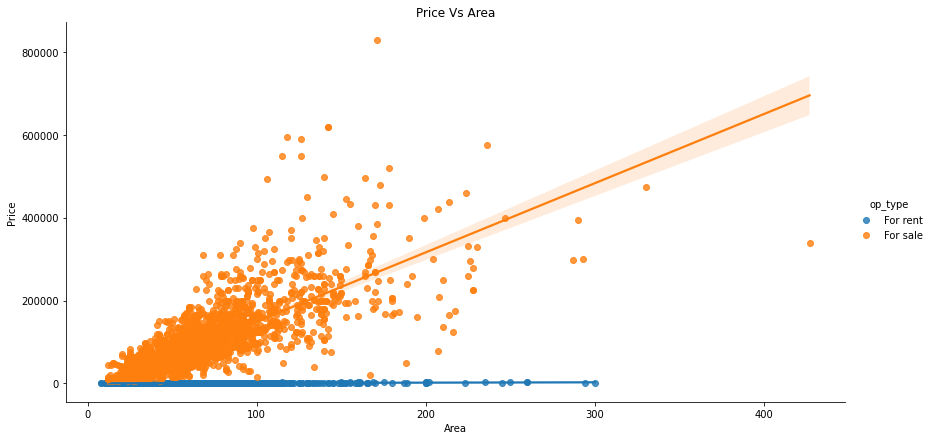

In [44]:
"""for our visualization purpose will fit line using seaborn library only for bmi as 
independent variable and charges as dependent variable"""

sns.lmplot(x='area',y='price',data=df_filt,aspect=2,height=6,hue='op_type')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Vs Area');

**OBSERVATION:**</br>
* There is a clear regression line which is a good thing but we need to split dataset into rent dataset and sale dataset to be able to see the line clearly .

<AxesSubplot:>

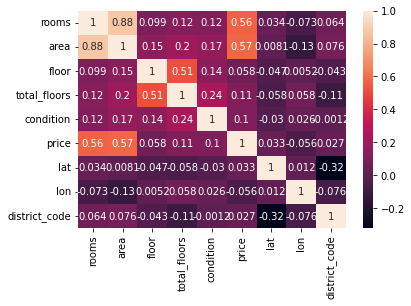

In [45]:
corr = df_filt.corr(method='spearman')
sns.heatmap(corr,cmap= 'rocket', annot=True )

It seems like I should split the data into two datasets one for sale and the other for rent becuase understanding the data would be easier and more beneficial 

In [46]:
df_sale = df_filt[df_filt['op_type'] == 'For sale']
df_rent = df_filt[df_filt['op_type'] == 'For rent']
print("The length of rent dataset is :", len(df_rent))
print("The length of sale dataset is :", len(df_sale))

The length of rent dataset is : 1507
The length of sale dataset is : 2651


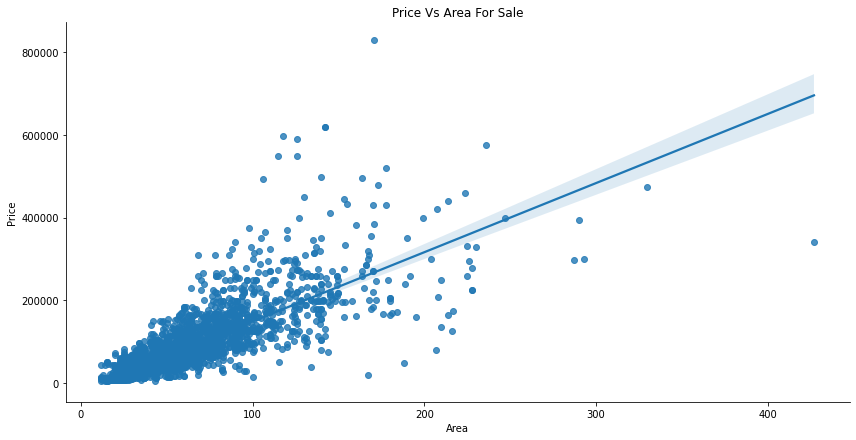

In [47]:
sns.lmplot(x='area',y='price',data=df_sale,aspect=2,height=6)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Vs Area For Sale');

**OBSERVATION:**</br>
* There is a clear regression line in the sale dataset, a couple of outliers can be clearly viewed.

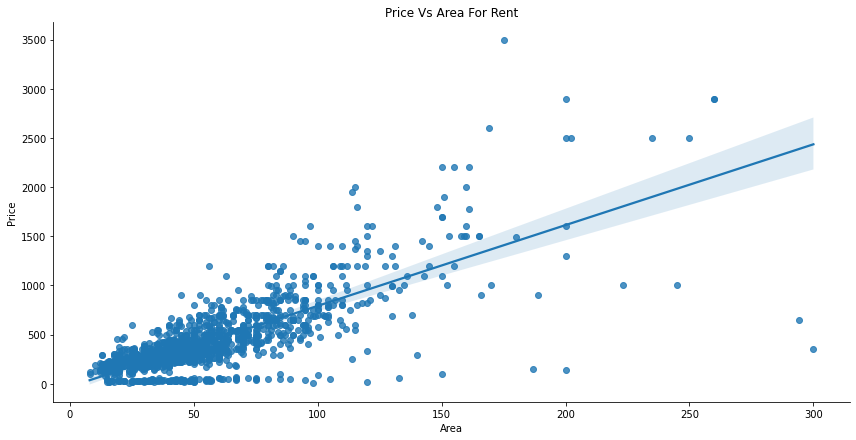

In [48]:
sns.lmplot(x='area',y='price',data=df_rent,aspect=2,height=6)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Vs Area For Rent');

**OBSERVATION:**</br>
* There is a clear regression line in the rent dataset, more outliers than the sale dataset are visible in this graph. Also, there is a noticeable group of data points where they do not fit into the line, neither are close to it, this might indicate possible failure in the prediction model.

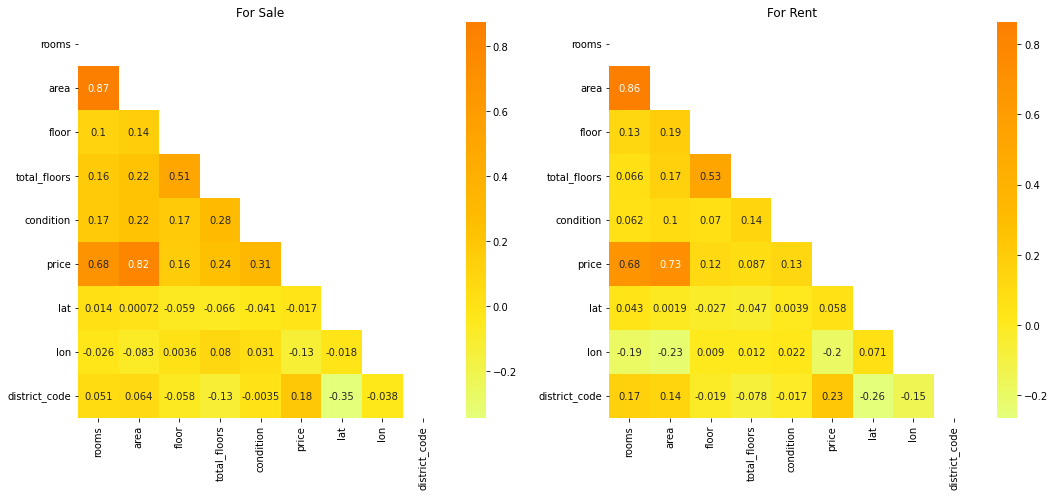

In [49]:
# Lower triangular matrix https://en.wikipedia.org/wiki/Triangular_matrix
mask1 = np.triu(np.ones_like(df_sale.corr()))
mask2 = np.triu(np.ones_like(df_rent.corr()))

plt.figure(figsize=(15, 7))

plt.subplot(121)
corr_sale = df_sale.corr(method='spearman')
sns.heatmap(corr_sale,cmap= 'Wistia', annot=True, mask=mask1)
plt.title("For Sale")

plt.subplot(122)
corr_rent = df_rent.corr(method='spearman')
sns.heatmap(corr_rent,cmap= 'Wistia', annot=True, mask=mask2)
plt.title("For Rent")

plt.tight_layout()

**OBSERVATION:**</br>
* In these two correlation graphs abovem which is for all columns, it can be seen that the highest correlation values are between the area/room and price independents, however, 0.82 between area and price in for sale dataset is slightly higher than the for rent data set, which is 0.73.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


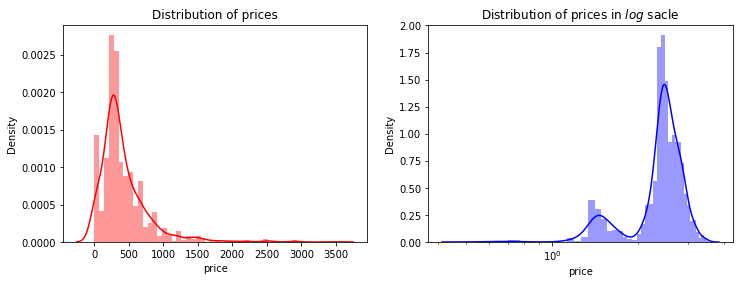

In [50]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df_rent['price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of prices')

ax=f.add_subplot(122)
sns.distplot(np.log10(df_rent['price']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of prices in $log$ sacle')
ax.set_xscale('log');

**OBSERVATION:**</br>
* The above graphs display the distribution of price as it is, and also after (log10)-normalization. Again, another indication that the for rent portion of data won't score high in our model, as the graphs are skewed.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


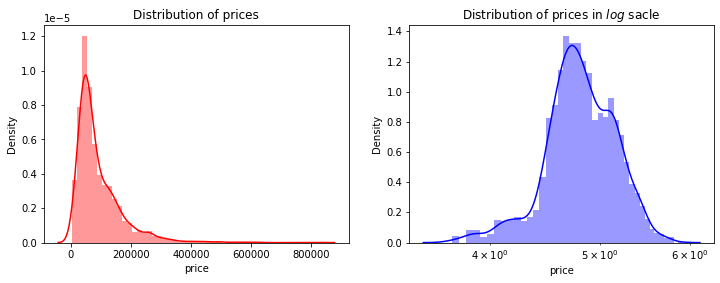

In [51]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df_sale['price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of prices')

ax=f.add_subplot(122)
sns.distplot(np.log10(df_sale['price']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of prices in $log$ sacle')
ax.set_xscale('log');

**OBSERVATION:**</br>
* The above graphs display the distribution of price as it is, and also after (log10)-normalization. The for the sale dataset, which was skewed previously, has improved notably after normalization, suggesting a great result of linear prediction. 

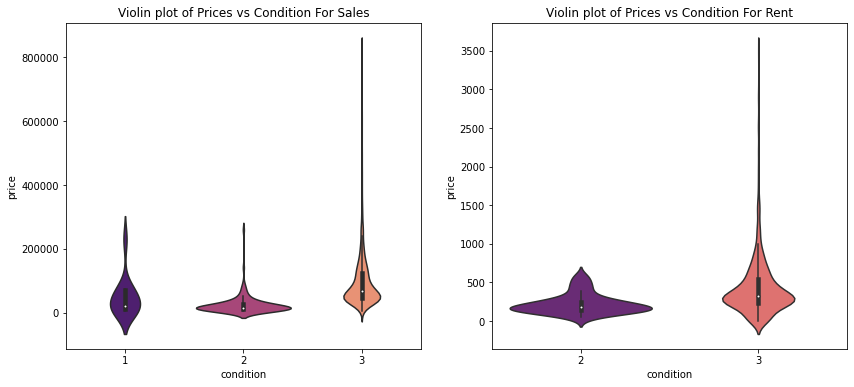

In [52]:
# f = plt.figure(figsize=(25,6))
# ax = f.add_subplot(121)
# sns.violinplot(x='district', y='price',data=df_rent,palette='rocket',ax=ax)
# ax.set_title('Violin plot of Prices vs District For Rent')

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='condition', y='price',data=df_sale,palette='magma',ax=ax)
ax.set_title('Violin plot of Prices vs Condition For Sales');

ax = f.add_subplot(122)
sns.violinplot(x='condition', y='price',data=df_rent,palette='magma',ax=ax)
ax.set_title('Violin plot of Prices vs Condition For Rent');

**OBSERVATION:**</br>
* The above right graph shows that the for rent dataset has no signal occurrence of 1, that is (without ameneties) value in the condition column.

Text(0.5, 1.0, 'Price Vs Floor Comparison For Rent')

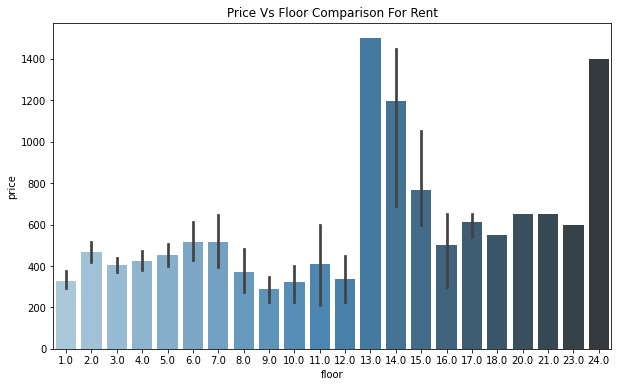

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'floor', y = 'price', data = df_rent , palette="Blues_d")
plt.title('Price Vs Floor Comparison For Rent')

Text(0.5, 1.0, 'Price Vs Floor Comparison For Sale')

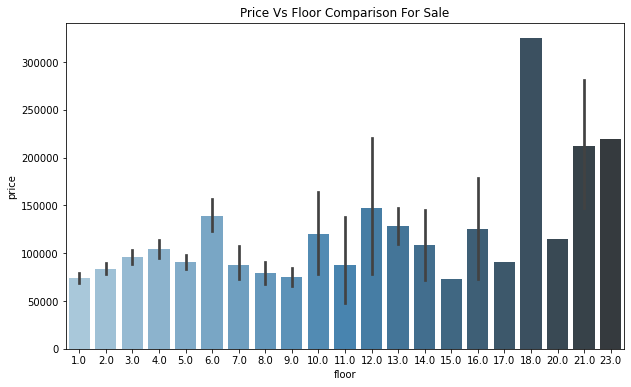

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'floor', y = 'price', data = df_sale , palette="Blues_d")
plt.title('Price Vs Floor Comparison For Sale')

**OBSERVATION:**</br>
* It makes sense why in the correlation coefficient there was no relationship or high score between the price and floor variables but it's interesting to see that there is certain values of floor that increased the price but let's check the sample size it might be the reasoon why there is no clear relationship here.

Text(0.5, 1.0, 'Price Vs house_seria Comparison For Sale')

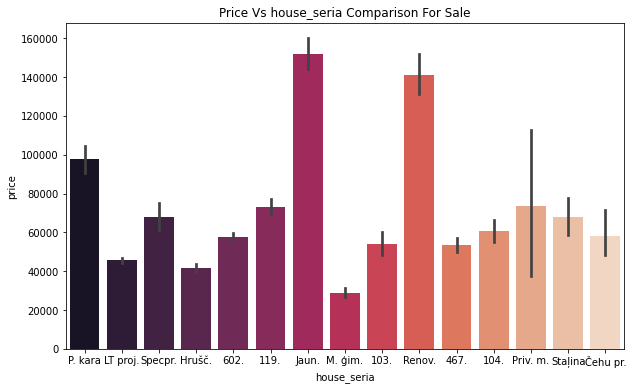

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'house_seria', y = 'price', data = df_sale , palette="rocket")
plt.title('Price Vs house_seria Comparison For Sale')

Text(0.5, 1.0, 'Price Vs house_seria Comparison For Rent')

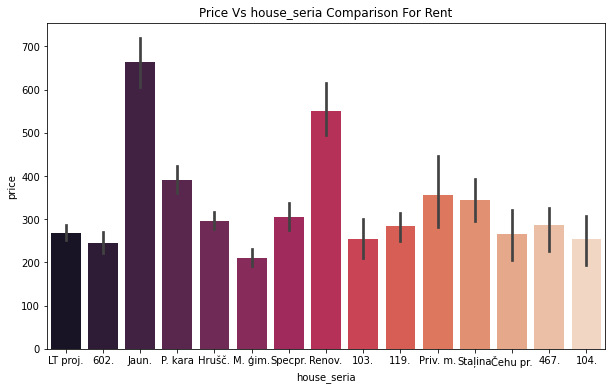

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'house_seria', y = 'price', data = df_rent , palette="rocket")
plt.title('Price Vs house_seria Comparison For Rent')

**OBSERVATION:**</br>
* The two graphs above, represent the price for each house_seria, one for sale and one for rent. In the former, each house_seria has a distinct price, Juan being the most expensive, whilst, M.gum accounts for the lowest prices when selling. These are also true in terms of renting, however, the variation of all other types is not notably distinguished as found in the for sale data.

Text(0.5, 1.0, 'Price Vs house_type Comparison For Sale')

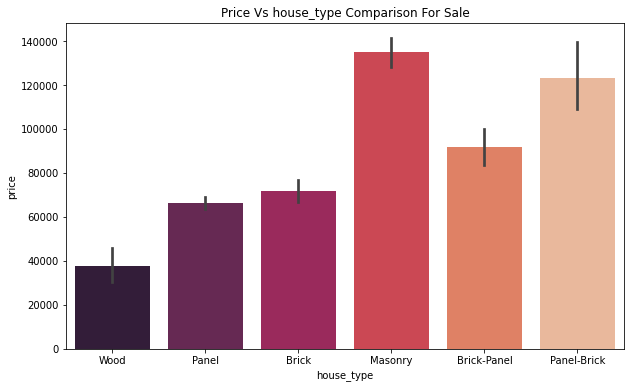

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'house_type', y = 'price', data = df_sale , palette="rocket")
plt.title('Price Vs house_type Comparison For Sale')

Text(0.5, 1.0, 'Price Vs house_type Comparison For Rent')

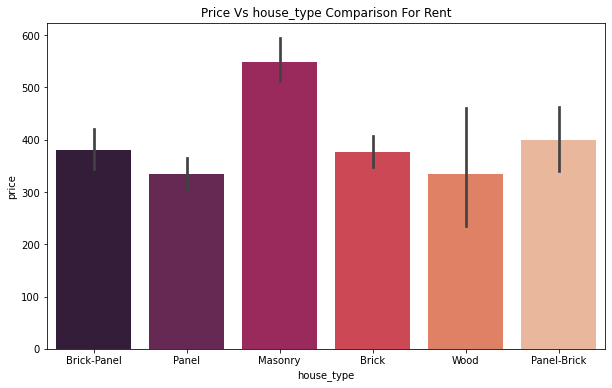

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'house_type', y = 'price', data = df_rent , palette="rocket")
plt.title('Price Vs house_type Comparison For Rent')

**OBSERVATION:**</br>
* Again, probably for the smaller data set accounted for the rent data, there is not much variation of house_types impact on price, in contrast to the for sale data. Regardless. in both scenarios, Masonry house types are the most prefered, while the wood is at the lowest, as plotted in the two above bar charts.

Text(0.5, 1.0, 'Price Vs District Comparison')

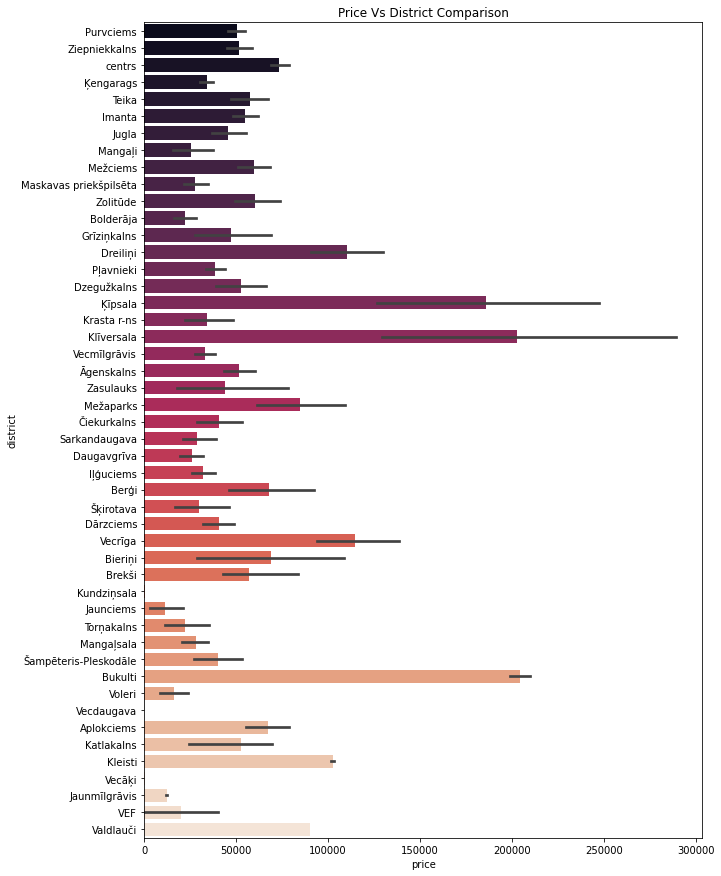

In [59]:
plt.figure(figsize=(10,15))
sns.barplot(x = 'price', y = 'district', data = df_filt , palette="rocket",orient="h")
plt.title('Price Vs District Comparison')

**OBSERVATION:**</br>
* In this graph, it is seen clearly variance of prices based on district, however, the highest price is probably an outlier in the Kliversala district. However, it could be confusing that three districts have almost a 0 price, but as we previously explored the data set, 5 was the lowest worth in our samples. thus maybe increasing the width scale of this graph will show that there are no 0 values of price.

# Data Preprocessing

### Task 1: coding categorical data

Checking where categorical data are found 

In [60]:
# to check where categorical data are
df_filt.dtypes

op_type           object
district          object
street            object
rooms              int64
area             float64
floor            float64
total_floors     float64
house_seria       object
house_type        object
condition          int64
price            float64
lat              float64
lon              float64
district_code      int64
dtype: object

In [61]:
# Dummy variable
categorical_columns = [ 'house_type','house_seria']
df_encode = pd.get_dummies(data = df_filt, prefix = 'OHE', prefix_sep='_',columns = categorical_columns,drop_first =True,dtype='int8')
df_encode

,op_type,district,street,rooms,area,floor,total_floors,condition,price,lat,...,OHE_Hrušč.,OHE_Jaun.,OHE_LT proj.,OHE_M. ģim.,OHE_P. kara,OHE_Priv. m.,OHE_Renov.,OHE_Specpr.,OHE_Staļina,OHE_Čehu pr.
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,3,250.0,56.955484,...,0,0,1,0,0,0,0,0,0,0
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,3,300.0,56.899798,...,0,0,0,0,0,0,0,0,0,0
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,2,13500.0,56.975092,...,0,0,0,0,1,0,0,0,0,0
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,3,34000.0,56.859788,...,0,0,1,0,0,0,0,0,0,0
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,3,490.0,56.977745,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,For rent,Āgenskalns,Elvīras 13a,1,30.0,4.0,5.0,3,250.0,56.946360,...,0,0,1,0,0,0,0,0,0,0
4685,For rent,Daugavgrīva,Birzes 32,1,32.0,2.0,5.0,3,180.0,57.037321,...,0,0,0,0,0,0,0,0,0,0
4686,For sale,Purvciems,Vaidavas 2,2,43.0,5.0,5.0,2,44850.0,56.965118,...,1,0,0,0,0,0,0,0,0,0
4687,For sale,Čiekurkalns,Čiekurkalna 7. šķ l. 3k2,1,18.0,1.0,2.0,3,10445.0,NaN,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df_filt.columns.values)
print('\nNumber of rows and columns in the dataset:',df_filt.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)


Columns in original data frame:
 ['op_type' 'district' 'street' 'rooms' 'area' 'floor' 'total_floors'
 'house_seria' 'house_type' 'condition' 'price' 'lat' 'lon'
 'district_code']

Number of rows and columns in the dataset: (4158, 14)

Columns in data frame after encoding dummy variable:
 ['op_type' 'district' 'street' 'rooms' 'area' 'floor' 'total_floors'
 'condition' 'price' 'lat' 'lon' 'district_code' 'OHE_Brick-Panel'
 'OHE_Masonry' 'OHE_Panel' 'OHE_Panel-Brick' 'OHE_Wood' 'OHE_104.'
 'OHE_119.' 'OHE_467.' 'OHE_602.' 'OHE_Hrušč.' 'OHE_Jaun.' 'OHE_LT proj.'
 'OHE_M. ģim.' 'OHE_P. kara' 'OHE_Priv. m.' 'OHE_Renov.' 'OHE_Specpr.'
 'OHE_Staļina' 'OHE_Čehu pr.']

Number of rows and columns in the dataset: (4158, 31)


Splitting encoded dataset into :
* For Sale
* For Rent

In [63]:
sale_dataset = df_encode[df_encode['op_type'] == 'For sale']
rent_dataset = df_encode[df_encode['op_type'] == 'For rent']
print("The length of rent dataset is :", len(rent_dataset))
print("The length of sale dataset is :", len(sale_dataset))

The length of rent dataset is : 1507
The length of sale dataset is : 2651


## Task 2 :  Removing features 

In [64]:
cols = ['op_type','street','lat','lon','district','total_floors']
rent_dataset.drop(axis=1,columns=cols, inplace = True)
sale_dataset.drop(axis=1,columns=cols, inplace = True)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


We have removed these columns: ['op_type','street','lat','lon','district','total floors'] of the data frame, because they are of little or no value to our model.

In [65]:
rent_dataset

,rooms,area,floor,condition,price,district_code,OHE_Brick-Panel,OHE_Masonry,OHE_Panel,OHE_Panel-Brick,...,OHE_Hrušč.,OHE_Jaun.,OHE_LT proj.,OHE_M. ģim.,OHE_P. kara,OHE_Priv. m.,OHE_Renov.,OHE_Specpr.,OHE_Staļina,OHE_Čehu pr.
0,1,27.0,3.0,3,250.0,26,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,50.0,7.0,3,300.0,39,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,76.0,3.0,3,490.0,29,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2,40.0,3.0,3,440.0,41,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,2,49.0,3.0,3,240.0,11,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,1,21.0,2.0,3,180.0,41,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4681,2,50.0,1.0,3,320.0,44,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4682,2,50.0,1.0,3,320.0,27,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4684,1,30.0,4.0,3,250.0,42,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


# Normalising Price Values
As we have anticipated by visualization that your date won't perform well in linear regression due to being skewed. Normalization of the dependent variable is needed to achieve better prediction outcomes, thus log is used.

In [66]:
## Log transform 
sale_dataset['price'] = np.log(sale_dataset['price'])
rent_dataset['price'] = np.log(rent_dataset['price'])

/var/folders/08/bs9nsl150qq7hdrkcrbsjnj40000gp/T/ipykernel_78940/874285860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_dataset['price'] = np.log(sale_dataset['price'])
/var/folders/08/bs9nsl150qq7hdrkcrbsjnj40000gp/T/ipykernel_78940/874285860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_dataset['price'] = np.log(rent_dataset['price'])


# Tarin Test Split

In [67]:

X_sale = sale_dataset.drop('price',axis=1) # Independet variable
y_sale = sale_dataset['price'] # dependent variable

X_train_sale, X_test_sale, y_train_sale, y_test_sale = train_test_split(X_sale,y_sale,test_size=0.3,random_state=23)
# train vars, test vars  , train results, test results 

In [68]:
X_rent = rent_dataset.drop('price',axis=1) # Independet variable
y_rent = rent_dataset['price'] # dependent variable

X_train_rent, X_test_rent, y_train_rent, y_test_rent = train_test_split(X_rent,y_rent,test_size=0.3,random_state=23)

In [69]:
X_rent

,rooms,area,floor,condition,district_code,OHE_Brick-Panel,OHE_Masonry,OHE_Panel,OHE_Panel-Brick,OHE_Wood,...,OHE_Hrušč.,OHE_Jaun.,OHE_LT proj.,OHE_M. ģim.,OHE_P. kara,OHE_Priv. m.,OHE_Renov.,OHE_Specpr.,OHE_Staļina,OHE_Čehu pr.
0,1,27.0,3.0,3,26,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,50.0,7.0,3,39,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,76.0,3.0,3,29,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2,40.0,3.0,3,41,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,2,49.0,3.0,3,11,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,1,21.0,2.0,3,41,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4681,2,50.0,1.0,3,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4682,2,50.0,1.0,3,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4684,1,30.0,4.0,3,42,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
X_sale

,rooms,area,floor,condition,district_code,OHE_Brick-Panel,OHE_Masonry,OHE_Panel,OHE_Panel-Brick,OHE_Wood,...,OHE_Hrušč.,OHE_Jaun.,OHE_LT proj.,OHE_M. ģim.,OHE_P. kara,OHE_Priv. m.,OHE_Renov.,OHE_Specpr.,OHE_Staļina,OHE_Čehu pr.
2,2,33.0,1.0,2,41,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2,50.0,5.0,3,44,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,2,37.0,5.0,3,44,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,2,46.0,4.0,3,21,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11,3,58.0,4.0,3,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679,4,145.0,3.0,3,41,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4683,1,34.0,3.0,2,41,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4686,2,43.0,5.0,2,26,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4687,1,18.0,1.0,3,43,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model building
source : https://www.kaggle.com/sudhirnl7/linear-regression-tutorial?scriptVersionId=31415973&cellId=37 

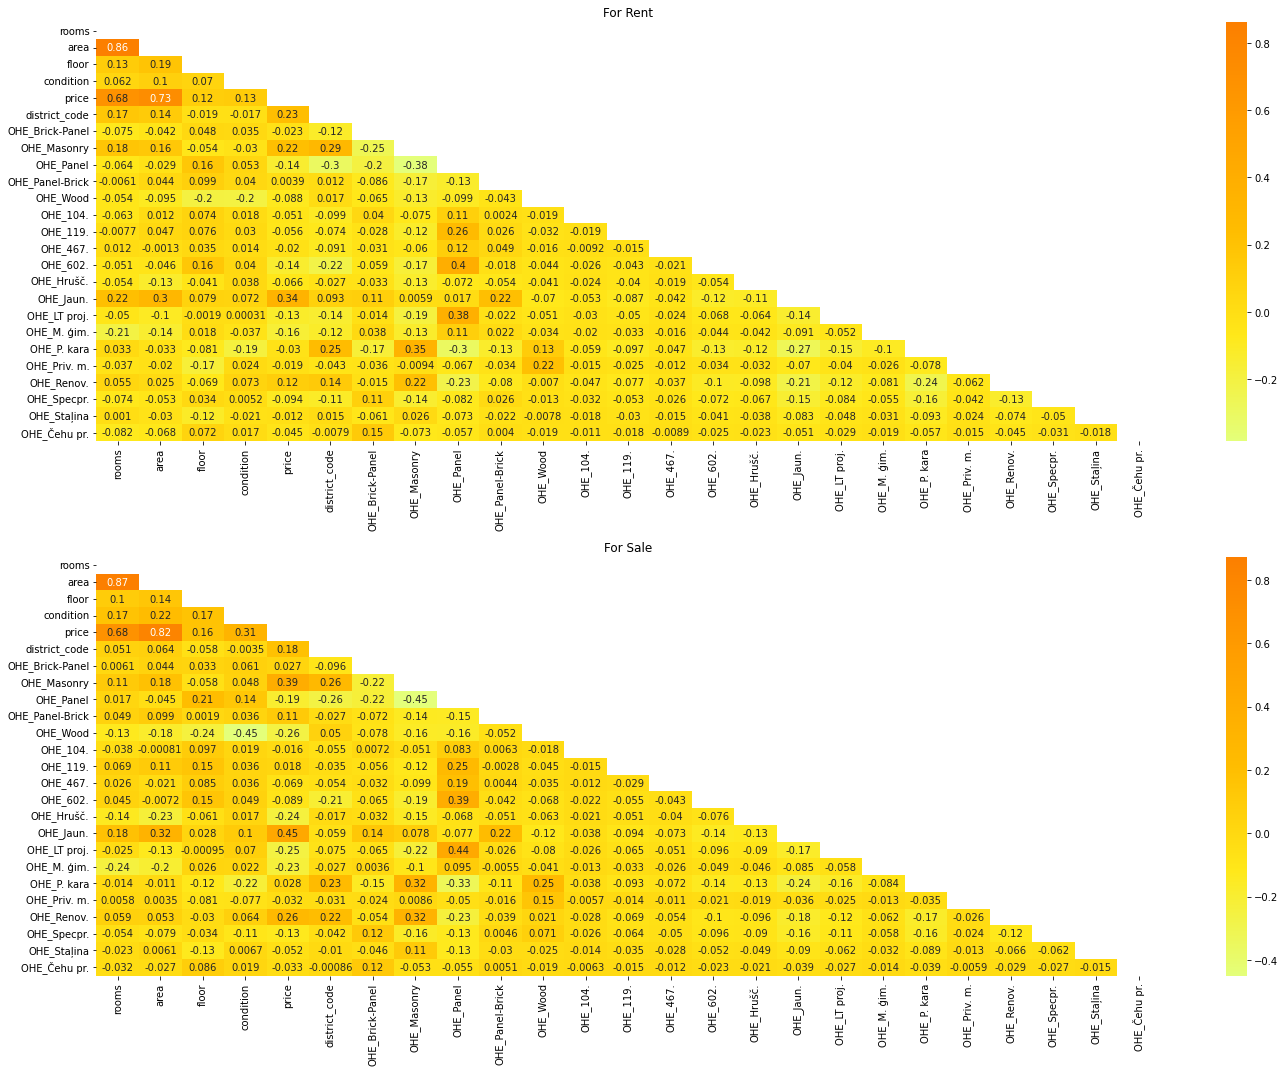

In [71]:
# Was made for debugging :)

mask1 = np.triu(np.ones_like(rent_dataset.corr()))
mask2 = np.triu(np.ones_like(sale_dataset.corr()))

plt.figure(figsize=(20, 15))

plt.subplot(211)
corr_sale = rent_dataset.corr(method='spearman')
sns.heatmap(corr_sale,cmap= 'Wistia', annot=True, mask=mask1)
plt.title("For Rent")

plt.subplot(212)
corr_rent = sale_dataset.corr(method='spearman')
sns.heatmap(corr_rent,cmap= 'Wistia', annot=True, mask=mask2)
plt.title("For Sale")

plt.tight_layout()

### Step 1: add x0 =1 to dataset
https://www.unite.ai/what-is-linear-regression/ </br>
https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a

In [72]:
# FOR SALE
# Step 1: add x0 =1 to dataset
X_train_sale_0 = np.c_[np.ones((X_train_sale.shape[0],1)),X_train_sale]
X_test_sale_0 = np.c_[np.ones((X_test_sale.shape[0],1)),X_test_sale]


In [73]:
# FOR RENT
# Step 1: add x0 =1 to dataset
X_train_rent_0 = np.c_[np.ones((X_train_rent.shape[0],1)),X_train_rent]
X_test_rent_0 = np.c_[np.ones((X_test_rent.shape[0],1)),X_test_rent]

In [74]:
np.c_[np.ones((X_train_sale.shape[0],1)),X_train_sale]

array([[  1.,   4.,  82., ...,   0.,   0.,   0.],
       [  1.,   1.,  33., ...,   0.,   0.,   0.],
       [  1.,   4.,  90., ...,   0.,   0.,   0.],
       ...,
       [  1.,   3.,  88., ...,   0.,   0.,   0.],
       [  1.,   2.,  50., ...,   0.,   0.,   0.],
       [  1.,   3., 124., ...,   0.,   0.,   0.]])

### Step 2 : build model

In [75]:
#FOR SALE
# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_sale_0.T,X_train_sale_0) ), np.matmul(X_train_sale_0.T,y_train_sale)) 
# FOR RENT
# Step2: build model
theta2 = np.matmul(np.linalg.inv( np.matmul(X_train_rent_0.T,X_train_rent_0) ), np.matmul(X_train_rent_0.T,y_train_rent)) 

In [76]:
theta

array([ 8.23327489e+00,  1.19353619e-01,  8.72688387e-03,  1.82815748e-02,
        5.47371337e-01,  3.66346774e-03,  4.45615249e-02,  1.15863576e-01,
        1.04623128e-01,  8.21528869e-02, -5.30865578e-01,  7.44142076e-02,
       -7.56865202e-03, -1.16340608e-01, -1.42720842e-02, -7.08958402e-02,
        5.71605407e-01, -1.56296802e-01, -3.83246321e-01,  2.56042552e-01,
        1.52013824e-01,  6.13465758e-01,  2.33008354e-02, -9.26333905e-02,
        8.93695681e-02])

### Step 3 :  The parameters for linear regression model

* R squared explained : https://www.analyticsvidhya.com/blog/2021/05/the-game-of-increasing-r-squared-in-a-regression-model/

In [77]:
#FOR SALE :  The parameters for linear regression model 
parameter_sale = ['theta_'+str(i) for i in range(X_train_sale_0.shape[1])]
columns_sale = ['intersect:x_0=1'] + list(X_sale.columns.values) 
parameter_df_sale = pd.DataFrame({'Sale : Parameter':parameter_sale,'Columns':columns_sale,'theta':theta})

# FOR RENT : The parameters for linear regression model
parameter_rent = ['theta2_'+str(i) for i in range(X_train_rent_0.shape[1])]
columns_rent = ['intersect:x_0=1'] + list(X_rent.columns.values)
parameter_df_rent = pd.DataFrame({'Rent : Parameter':parameter_rent,'Columns':columns_rent,'theta':theta2})

In [78]:
# Scikit Learn module

lin_reg = LinearRegression()
lin_reg.fit(X_train_sale,y_train_sale) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df_sale = parameter_df_sale.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df_sale

,Sale : Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,8.233275,8.233275
1,theta_1,rooms,0.119354,0.119354
2,theta_2,area,0.008727,0.008727
3,theta_3,floor,0.018282,0.018282
4,theta_4,condition,0.547371,0.547371
5,theta_5,district_code,0.003663,0.003663
6,theta_6,OHE_Brick-Panel,0.044562,0.044562
7,theta_7,OHE_Masonry,0.115864,0.115864
8,theta_8,OHE_Panel,0.104623,0.104623
9,theta_9,OHE_Panel-Brick,0.082153,0.082153


The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

In [79]:

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_rent,y_train_rent) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta2 = [lin_reg2.intercept_]+list(lin_reg2.coef_)
parameter_df_rent = parameter_df_rent.join(pd.Series(sk_theta2, name='Sklearn_theta'))
parameter_df_rent

,Rent : Parameter,Columns,theta,Sklearn_theta
0,theta2_0,intersect:x_0=1,4.404334,4.404334
1,theta2_1,rooms,0.157118,0.157118
2,theta2_2,area,0.011365,0.011365
3,theta2_3,floor,0.008088,0.008088
4,theta2_4,condition,0.061772,0.061772
5,theta2_5,district_code,0.001707,0.001707
6,theta2_6,OHE_Brick-Panel,0.065635,0.065635
7,theta2_7,OHE_Masonry,0.064456,0.064456
8,theta2_8,OHE_Panel,-0.048111,-0.048111
9,theta2_9,OHE_Panel-Brick,-0.250155,-0.250155


In [80]:
# source : https://stackoverflow.com/a/50747938
# More regression metrices : https://scikit-learn.org/stable/modules/classes.html#regression-metrics

regressor = LinearRegression()
regressor.fit(X_train_sale,y_train_sale)
r2_score = regressor.score(X_test_sale,y_test_sale)
print("The Sale dataset score R-squared (R2):",r2_score*100,'%')
regressor = LinearRegression()
regressor.fit(X_train_rent,y_train_rent)
r2_score = regressor.score(X_test_rent,y_test_rent)
print("The Rent dataset score R-squared (R2):",r2_score*100,'%')

The Sale dataset score R-squared (R2): 80.55019512215034 %
The Rent dataset score R-squared (R2): 25.692329276494863 %


In [81]:
regressor

LinearRegression()

# Model Evaluation 

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute **Mean Square Error** using formula 
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

In [82]:
# Normal equation
y_pred_norm =  np.matmul(X_test_sale_0,theta)

In [83]:
#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test_sale)**2)/ X_test_sale_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test_sale)**2)
sst = np.sum((y_test_sale - y_test_sale.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.11361780808787787
R square obtain for normal equation method is : 0.8055019512214718


In [84]:
# Normal equation
y_pred_norm2 =  np.matmul(X_test_rent_0,theta2)

In [85]:
#Evaluvation: MSE
J_mse2 = np.sum((y_pred_norm2 - y_test_rent)**2)/ X_test_rent_0.shape[0]

# R_square 
sse2 = np.sum((y_pred_norm2 - y_test_rent)**2)
sst2 = np.sum((y_test_rent - y_test_rent.mean())**2)
R_square2 = 1 - (sse2/sst2)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse2)
print('R square obtain for normal equation method is :',R_square2)

The Mean Square Error(MSE) or J(theta) is:  0.6729427915952074
R square obtain for normal equation method is : 0.25692329276492354


In [86]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test_sale)

#Evaluvation: MSE
J_mse_sk = mean_squared_error(y_pred_sk, y_test_sale)

# R_square
R_square_sk = lin_reg.score(X_test_sale,y_test_sale)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.11361780808785944
R square obtain for scikit learn library is : 0.8055019512215034


In [87]:
# sklearn regression module
y_pred_sk2 = lin_reg.predict(X_test_rent)

#Evaluvation: MSE
J_mse_sk2 = mean_squared_error(y_pred_sk2, y_test_rent)

# R_square
R_square_sk2 = lin_reg.score(X_test_rent,y_test_rent)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk2)
print('R square obtain for scikit learn library is :',R_square_sk2)

The Mean Square Error(MSE) or J(theta) is:  29.71063959374301
R square obtain for scikit learn library is : -31.807074412421535


# Model Validation

In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following<br/>
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value 
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


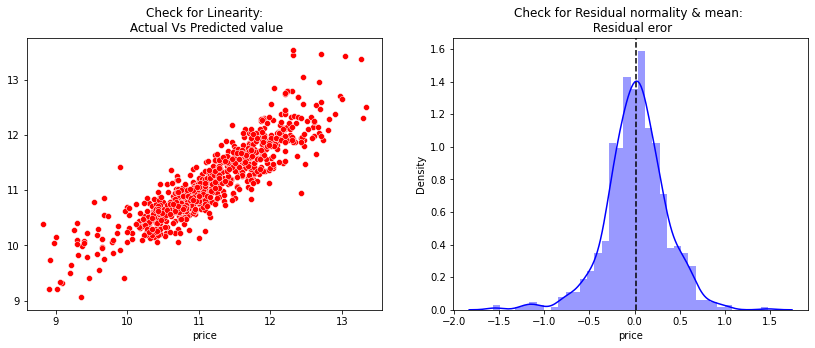

In [88]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test_sale,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test_sale - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test_sale - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


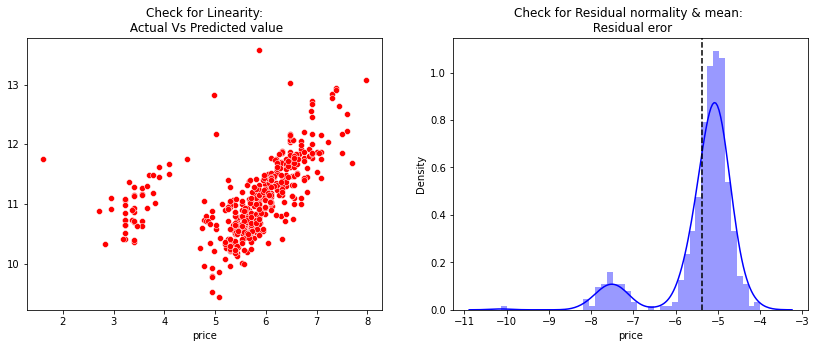

In [89]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test_rent,y_pred_sk2,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test_rent - y_pred_sk2),ax=ax,color='b')
ax.axvline((y_test_rent - y_pred_sk2).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

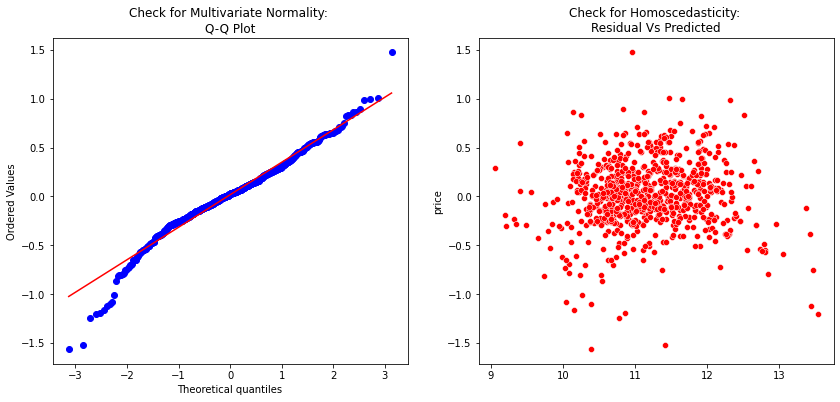

In [90]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))

_,(_,_,r)= sp.stats.probplot((y_test_sale - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test_sale - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

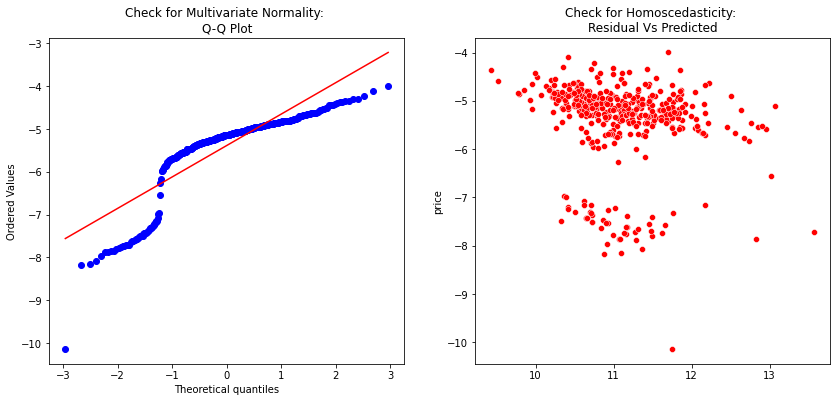

In [91]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
_,(_,_,r)= sp.stats.probplot((y_test_rent - y_pred_sk2),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test_rent - y_pred_sk2), x= y_pred_sk2, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [92]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

5.141439753664811

In [93]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk2)
VIF

0.03048123058547934

The model assumption linear regression as follows
1. In our model, the actual vs predicted plot of (for sale) is linear so linear assumption works, however, it fails in (for rent), as the plot is not aligned in liner rather scattered almost in a two non-parallel lines.
2. The residual mean is zero and residual error plot normally disterbuted for (for sale) dataset, whilest the residual error plot left skewed in (for rent, and the mean greater then 0.
3. Q-Q plot shows for (for sale), shows that data are slightly skewed but mostly normally distributed; the Q-Q plot for (for rent) shows that date are heavily left skewed.
4. The plot is exhibit homoscedasticity in (for sale) dataset, and heteroscedastic in (for rent) dataset, the error will insease after certian point for the latter dataset.
5. Variance inflation factor value in (for sale) is a little bit above 5, which mean critical level of multicollinearity, while in (for rent) is less than 1, so no multicollearity.

In [105]:
!jupyter nbconvert --output='index' --output-dir='../' --to html Riga_RealEstate.ipynb

[NbConvertApp] Converting notebook Riga_RealEstate.ipynb to html
[NbConvertApp] Writing 2297332 bytes to ../index.html
